In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv('./winequality-red.csv')
df = df.dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
df.groupby(['quality']).mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


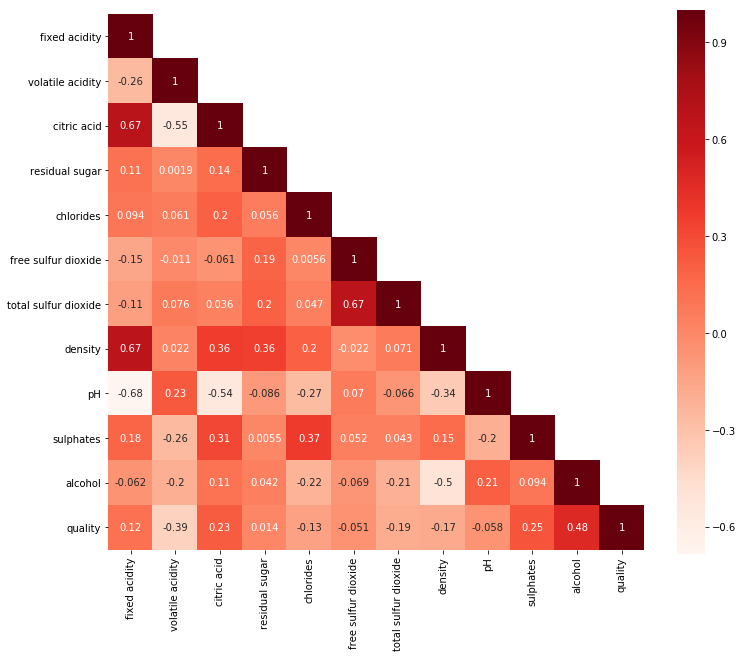

In [7]:
#corelation matrix.
corr= df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(12,10)
sns.heatmap(data=corr,mask=mask,square=True,annot=True,cbar=True,cmap=plt.cm.Reds)

In [8]:
corr_target = abs(corr["quality"])

relevant_features = corr_target[corr_target>0.2]
relevant_features

volatile acidity    0.390558
citric acid         0.226373
sulphates           0.251397
alcohol             0.476166
quality             1.000000
Name: quality, dtype: float64

In [9]:
print(df[["volatile acidity","citric acid", "sulphates", "alcohol"]].corr())
# Might drop citric acid  since it correlate som with volatile acidity
# But that can be explored in the end

                  volatile acidity  citric acid  sulphates   alcohol
volatile acidity          1.000000    -0.552496  -0.260987 -0.202288
citric acid              -0.552496     1.000000   0.312770  0.109903
sulphates                -0.260987     0.312770   1.000000  0.093595
alcohol                  -0.202288     0.109903   0.093595  1.000000


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

X = df[["volatile acidity","citric acid", "sulphates", "alcohol"]]
X = preprocessing.scale(X)
Y = df[["quality"]]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [11]:
from sklearn.linear_model import SGDRegressor

sgdRegressor = SGDRegressor()
sgdRegressor.fit(X_train, y_train)

y_pred = sgdRegressor.predict(X_test)
print('SGDRegressor R squared": %.4f' % sgdRegressor.score(X_test, y_test))

mse = mean_squared_error(y_pred, y_test)
print('SGDRegressor MSE: %.4f' % mse)

rmse = np.sqrt(mse)
print('SGDRegressor RMSE: %.4f' % rmse)

mae = mean_absolute_error(y_pred, y_test)
print('SGDRegressor MAE: %.4f' % mae)

C:\Users\joaki\.conda\envs\3.7\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\joaki\.conda\envs\3.7\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor R squared": 0.3010
SGDRegressor MSE: 0.4124
SGDRegressor RMSE: 0.6422
SGDRegressor MAE: 0.4994


In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
print('Lasso R squared": %.4f' % lasso.score(X_test, y_test))

mse = mean_squared_error(y_pred, y_test)
print('Lasso MSE: %.4f' % mse)

rmse = np.sqrt(mse)
print('Lasso RMSE: %.4f' % rmse)

mae = mean_absolute_error(y_pred, y_test)
print('Lasso MAE: %.4f' % mae)

Lasso R squared": -0.0045
Lasso MSE: 0.5926
Lasso RMSE: 0.7698
Lasso MAE: 0.6495


In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
print('Ridge R squared": %.4f' % ridge.score(X_test, y_test))

mse = mean_squared_error(y_pred, y_test)
print('Ridge MSE: %.4f' % mse)

rmse = np.sqrt(mse)
print('Ridge RMSE: %.4f' % rmse)

mae = mean_absolute_error(y_pred, y_test)
print('Ridge MAE: %.4f' % mae)

Ridge R squared": 0.2991
Ridge MSE: 0.4135
Ridge RMSE: 0.6431
Ridge MAE: 0.4998


In [14]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print('SVR R squared": %.4f' % svr.score(X_test, y_test))

mse = mean_squared_error(y_pred, y_test)
print('SVR MSE: %.4f' % mse)

rmse = np.sqrt(mse)
print('SVR RMSE: %.4f' % rmse)

mae = mean_absolute_error(y_pred, y_test)
print('SVR MAE: %.4f' % mae)

C:\Users\joaki\.conda\envs\3.7\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\joaki\.conda\envs\3.7\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR R squared": 0.3387
SVR MSE: 0.3902
SVR RMSE: 0.6246
SVR MAE: 0.4572


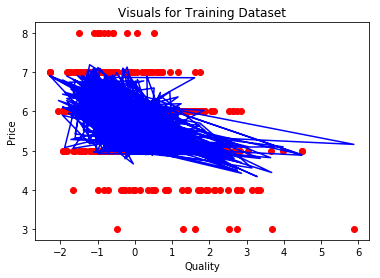

In [15]:
#Visualizing the training Test Results 

plt.scatter(X_train[:,0], y_train, color= 'red')
plt.plot(X_train[:,0], svr.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Quality")
plt.ylabel("Price")
plt.show()

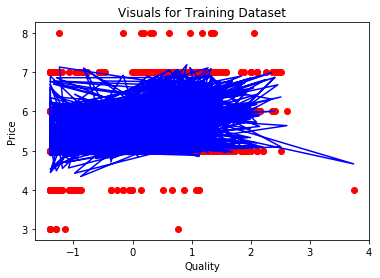

In [16]:
plt.scatter(X_train[:,1], y_train, color= 'red')
plt.plot(X_train[:,1], svr.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Quality")
plt.ylabel("Price")
plt.show()

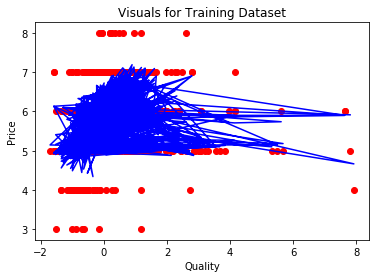

In [17]:
plt.scatter(X_train[:,2], y_train, color= 'red')
plt.plot(X_train[:,2], svr.predict(X_train), color = 'blue')
plt.title ("Visuals for Training Dataset")
plt.xlabel("Quality")
plt.ylabel("Price")
plt.show()

In [18]:
from keras.models import Sequential
from keras import layers
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

input_dim = X_train.shape[1]  # Number of features
output_dim = y_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(input_dim * 2, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(input_dim * 4, activation='relu'))
# model.add(layers.Dropout(.8))

model.add(layers.Dense(input_dim * 8, activation='relu'))
# model.add(layers.Dropout(.8))

model.add(layers.Dense(input_dim * 8, activation='relu'))
# model.add(layers.Dropout(.8))
model.add(layers.Dense(input_dim * 4, activation='relu'))

model.add(layers.Dense(input_dim * 4, activation='relu'))

model.add(layers.Dense(input_dim * 2, activation='relu'))

model.add(layers.Dense(input_dim, activation='relu'))

model.add(layers.Dense(output_dim, activation='sigmoid'))




Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='mean_squared_error', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
__________

In [23]:
from keras.callbacks import EarlyStopping
    
es = EarlyStopping(monitor='val_loss', mode='min', patience=20)

model_output = model.fit(X_train, y_train,
                    epochs=1000,
#                     verbose=10,
                    validation_data=(X_test, y_test),
                    batch_size=X_train.shape[1],
#                     use_multiprocessing=True, 
#                     workers=8,
                    callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 1119 samples, validate on 480 samples
Epoch 1/1000


InternalError: Blas GEMM launch failed : a.shape=(4, 4), b.shape=(4, 8), m=4, n=8, k=4
	 [[{{node dense_1/MatMul}}]]
	 [[{{node metrics/acc/Mean_1}}]]

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


print('Training Accuracy : ' , np.mean(model_output.history["acc"]))
print('Validation Accuracy : ' , np.mean(model_output.history["val_acc"]))



# Plot training & validation accuracy values
plt.plot(model_output.history['acc'])
plt.plot(model_output.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(model_output.history['loss'])
plt.plot(model_output.history['val_loss'])
plt.title('model_output loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()